In [19]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [45]:
# read CSV
data = pd.read_csv("NVDA_1D.csv")

In [47]:
print(data.head())

        date        open        high         low       close        MA21  \
0  14/3/2025  118.610000  121.880000  118.150000  121.670000  120.674510   
1  13/3/2025  117.030000  117.760000  113.790000  115.580000  120.574961   
2  12/3/2025  114.120000  116.760000  112.880000  115.740000  121.074457   
3  11/3/2025  106.980162  112.225680  104.760366  108.750000  121.607903   
4  10/3/2025  109.889895  111.839715  105.450303  106.970163  122.893693   

         MA60       MA200     Volume        RSI  
0  127.598933  120.969983  277593455  49.330691  
1  127.799914  120.962948  299033131  43.473716  
2  128.214149  121.017048  323857454  43.596658  
3  128.637001  121.070084  354865692  36.287449  
4  129.311137  121.193904  366487363  34.273616  


In [49]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1810 entries, 0 to 1809
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1810 non-null   object 
 1   open    1810 non-null   float64
 2   high    1810 non-null   float64
 3   low     1810 non-null   float64
 4   close   1810 non-null   float64
 5   MA21    1810 non-null   float64
 6   MA60    1810 non-null   float64
 7   MA200   1810 non-null   float64
 8   Volume  1810 non-null   int64  
 9   RSI     1810 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 141.5+ KB
None


In [53]:
# convert formt Datetime
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')

# X, y
X = data[['MA21', 'MA60', 'MA200', 'RSI','Volume']].values
Y = data['close'].values

In [55]:
# Training และ Testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [57]:
# Train model >>> Linear Regression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [59]:
Y_pred = model.predict(X_test)

In [65]:
# evaluate the model
r2 = r2_score(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

print(f'R² Score: {r2:.2f}')
print(f'RMSE (Root Mean Squared Error): {rmse:.2f}')

R² Score: 1.00
RMSE (Root Mean Squared Error): 1.93


In [67]:
# Calculate: Prediction Interval 
confidence = 0.95
n = len(Y_test)
mean_pred = np.mean(Y_pred)
std_pred = np.std(Y_pred)
interval_range = 1.96 * std_pred / np.sqrt(n)  # 95% Prediction Interval

print(f'Prediction Interval (95% CI): ± {interval_range:.2f}')

Prediction Interval (95% CI): ± 3.81


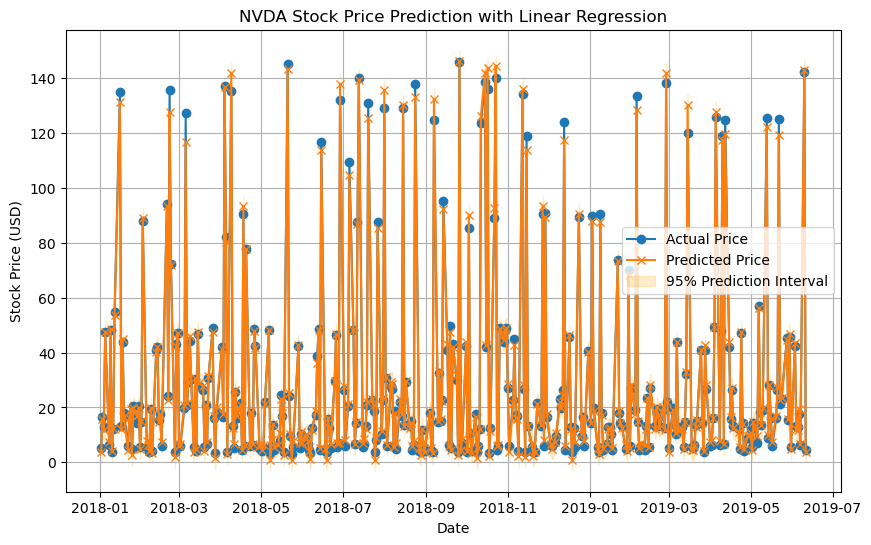

In [77]:
# Test Set
test_dates = data['date'].iloc[-len(Y_test):]

# 📊 แสดงกราฟผลลัพธ์
plt.figure(figsize=(10, 6))
plt.plot(test_dates, Y_test, label='Actual Price', marker='o')
plt.plot(test_dates, Y_pred, label='Predicted Price', marker='x')
plt.fill_between(test_dates, Y_pred - interval_range, Y_pred + interval_range, 
                 color='orange', alpha=0.2, label='95% Prediction Interval')
plt.title('NVDA Stock Price Prediction with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
print(model)

LinearRegression()
